# Аналитика в авиакомпании

## ОГЛАВЛЕНИЕ

1. [Описание проекта](#projekt) 
2. [Цель и задачи проекта](#purpose)     
3. [Описание данных](#data)    
4. [Открытие данных и изучение общей информации](#start)
5. [Предобработка и подготовка данных](#preprocessing)
6. [Парсинг и работа с базой данных](#parsing)
7. [Анализ данных средствами Python](#analysis)   
8. [Общий вывод](#conclusion)

### Описание проекта
<a name="projekt"></a>

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления.

### Цель и задачи проекта
<a name="purpose"></a>

Цель проекта - изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.   
<br>Для этого необходимо:  
1. Написать парсер для сбора с сайта данных о крупнейших фестивалях 2018 года.     
2. Провести исследовательский анализ данных:   
  - найти количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта;   
  - посчитать количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре 2018 года;  
  - посчитать среднее количество прибывающих рейсов в день для каждого города за август 2018 года.    
3. Проверить гипотезу, что количество рейсов во время фестивалей увеличивается:
  - установить фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили;
  - для каждой недели с 23 июля по 30 сентября 2018 года посчитать количество билетов, купленных на рейсы в Москву.   
4. Проанализировать данные средствами Python:   
  - выбрать топ-10 городов по количеству рейсов;  
  - построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

### Описание данных
<a name="data"></a>

#### База данных об авиаперевозках:
##### Таблица airports — информация об аэропортах:   
airport_code — трёхбуквенный код аэропорта   
airport_name — название аэропорта   
city — город   
timezone — временная зона   
##### Таблица aircrafts — информация о самолётах:   
aircraft_code — код модели самолёта     
model — модель самолёта   
range — количество самолётов 
##### Таблица tickets — информация о билетах:    
ticket_no — уникальный номер билета  
passenger_id — персональный идентификатор пассажира   
passenger_name — имя и фамилия пассажира   
##### Таблица flights — информация о рейсах:   
flight_id — уникальный идентификатор рейса   
departure_airport — аэропорт вылета   
departure_time — дата и время вылета   
arrival_airport — аэропорт прилёта   
arrival_time — дата и время прилёта   
aircraft_code – id самолёта   
##### Таблица ticket_flights — стыковая таблица «рейсы-билеты»   
ticket_no — номер билета   
flight_id — идентификатор рейса   
##### Таблица festivals — информация о фестивалях   
festival_id — уникальный номер фестиваля   
festival_date — дата проведения фестиваля   
festival_city — город проведения фестиваля   
festival_name — название фестиваля   
#### Схема таблиц в базе данных:    
![relationship_of_the_tables](https://pictures.s3.yandex.net/resources/photo_2019-11-08_14-08-31_1573733426.jpg)   
#### Результаты выполненных запросов:
##### Таблица model_flights — информация о полетах по моделям   
model — модель самолета   
flights_amount — количество рейсов для каждой модели самолетов в сентябре 2018 года     
##### Таблица city_flights — информация о полетах по городам   
city — город   
average_flights — среднее количество рейсов, прибывающих в город за день в августе 2018 года     

### Открытие данных и изучение общей информации
<a name="start"></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import matplotlib
matplotlib.style.use('seaborn-dark')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 9
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
   border: 1px  black solid !important;
  color: black !important;}

##### Таблица model_flights 

In [3]:
# прочитаем DataFrame
try:
    model_flights = pd.read_csv('query_1.csv')  # локальный путь
except:
    model_flights = pd.read_csv('/datasets/query_1.csv')  # путь на сервере
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
# проведем базовую проверку столбцов таблицы с количественными переменными 
model_flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [5]:
# посмотрим уникальые значения столбца таблицы с категориальными переменными 
model_flights['model'].unique()

array(['Airbus A319-100', 'Airbus A321-200', 'Boeing 737-300',
       'Boeing 767-300', 'Boeing 777-300', 'Bombardier CRJ-200',
       'Cessna 208 Caravan', 'Sukhoi SuperJet-100'], dtype=object)

In [6]:
# посмотрим сводную информацию таблицы
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
# определим количество пропущенных значений в таблице
model_flights.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [8]:
# посчитаем количество дубликатов
model_flights.duplicated().sum()

0

##### Таблица city_flights

In [9]:
# прочитаем DataFrame
try:
    city_flights = pd.read_csv('query_3.csv')  # локальный путь
except:
    city_flights = pd.read_csv('/datasets/query_3.csv')  # путь на сервере
city_flights.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [10]:
# проведем базовую проверку столбцов таблицы с количественными переменными 
city_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [11]:
# посмотрим уникальые значения столбца таблицы с категориальными переменными 
city_flights['city'].unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

In [12]:
# посмотрим сводную информацию таблицы
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [13]:
# определим количество пропущенных значений в таблице
city_flights.isnull().sum()

city               0
average_flights    0
dtype: int64

In [14]:
# посчитаем количество дубликатов
city_flights.duplicated().sum()

0

### Вывод

1. В таблице `model_flights` 8 строк и 2 столбца с данными о количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года, значения в одном столбце относятся к строковому типу, в другом - к целочисленному. Пропусков и дубликатов в данных нет, замена типа данных не требуется.   
2. В таблице `city_flights` 101 строка и 2 столбца с данными о среднем количестве прибывающих рейсов в день для каждого города за август 2018 года, значения в одном столбце относятся к строковому типу, в другом - к вешественному. Пропусков и дубликатов в данных нет, замена типа данных также не требуется. В то же время целесообразно округлить значения среднего количества рейсов до двух знаков после запятой.

### Предобработка и подготовка данных
<a name="preprocessing"></a>

In [15]:
# округлим значения среднего количества рейсов до двух знаков после запятой
city_flights['average_flights'] = round(city_flights['average_flights'], 2)
city_flights.head(10)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
5,Барнаул,2.61
6,Белгород,6.00
7,Белоярский,2.00
8,Благовещенск,1.00
9,Братск,1.00


По условиям задания анализ необходимо провести не по среднему количеству рейсов, а по общему, поэтому создадим соответствующий столбец.

In [16]:
# создадим столбец количества рейсов по городам
city_flights['total_flights'] = (city_flights['average_flights'] * 31).round(0)\
                                                                      .astype('int')
city_flights.head(10)

,city,average_flights,total_flights
0,Абакан,3.87,120
1,Анадырь,1.00,31
2,Анапа,2.16,67
3,Архангельск,5.35,166
4,Астрахань,2.45,76
5,Барнаул,2.61,81
6,Белгород,6.00,186
7,Белоярский,2.00,62
8,Благовещенск,1.00,31
9,Братск,1.00,31


### Вывод

Для удобства в дальнейшем исследовании в таблице `city_flights` значения среднего количества рейсов округлили до двух знаков после запятой. Кроме того, создали столбец с общим количеством рейсов по городам, значения в котором привели к целым числам.

### Парсинг и работа с базой данных
<a name="parsing"></a> 


Напишем парсер для сбора с [сайта](https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html) данных о крупнейших фестивалях 2018 года.

In [17]:
# напишем парсер
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
fest_head = []
for row in soup.find_all('th'):
    fest_head.append(row.text)
fest_content = []
for row in soup.find_all('tr'):
    if not row.find_all('th'):
        fest_content.append([element.text for element in row.find_all('td')])
festivals = pd.DataFrame(fest_content, columns = fest_head)        
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


Работа с базой данных осуществлена в тренажере.   
<br>Результаты работы с базой данных:  
1. Изучена таблица `airports` и выведен список городов, в которых есть аэропорты.     
2. Изучена таблица `flights` и подсчитано количество вылетов из каждого аэропорта вылета. Установлено, что количество вылетов варьируется от 34 до 6 376, то есть загруженность аэропортов значительно различается между собой.     
3. Найдено количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Результаты запроса сохранены в таблице `model_flights` для дальнейшего анализа.  
4. Подсчитано количество рейсов по всем моделям самолётов "Boeing", "Airbus" и другим в сентябре 2018 года. Установлено, что для "Airbus" оно составило 1 567, для "Boeing" - 1 530, других моделей - 13 188.  
5. Подсчитано среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Результаты запроса сохранены в таблице `city_flights` для дальнейшего анализа. 
6. Установлены фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выявлено три таких фестиваля: "Park Live" в тридцатую неделю, "Пикник Афиши" - в тридцать первую, "Видфест" - в тридцать шестую.  
7. Для каждой недели с 23 июля по 30 сентября 2018 года подсчитано количество билетов, купленных на рейсы в Москву. Гипотеза, что количество рейсов во время фестивалей увеличивается, не нашла своего подверждения.  

### Анализ данных средствами Python
<a name="analysis"></a>

##### Анализ зависимости количества рейсов от города

Чтобы проанализировать зависимость количества рейсов от города, необходимо провести категоризацию городов. Целесообразней всего категорировать города по численности населения. Для этого напишем парсер для сбора с [сайта](https://zema.su/blog/polnyi-spisok-vsekh-gorodov-rossii-po-chislennosti-naseleniya) данных о населении по городам России.

In [18]:
# напишем парсер
URL = 'https://zema.su/blog/polnyi-spisok-vsekh-gorodov-rossii-po-chislennosti-naseleniya'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
head = ['#', 'city', 'population']
content = []
for row in soup.find_all('tr'):
    content.append([element.text for element in row.find_all('p', attrs = {'class':'rtecenter'})])
city_population = pd.DataFrame(content, columns = head)
city_population = city_population.drop(['#'], axis = 1)
city_population = city_population.drop(index = [0]).reset_index(drop = True)
city_population.head(10)

,city,population
0,Москва,11514330
1,Санкт-Петербург,4848742
2,Новосибирск,1473737
3,Екатеринбург,1350136
4,Нижний Новгород,1250615
5,Самара,1164896
6,Омск,1153971
7,Казань,1143546
8,Челябинск,1130273
9,Ростов-на-Дону,1089851


In [19]:
# посмотрим сводную информацию полученной таблицы
city_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        1109 non-null   object
 1   population  1109 non-null   object
dtypes: object(2)
memory usage: 17.5+ KB


Значения численности населения относятся к строковому типу, необходимо привести их к целым числам.

In [20]:
# приведем значения столбца таблицы с численностью населения к целым числам
city_population['population'] = city_population['population'].astype('int')
city_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        1109 non-null   object
 1   population  1109 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 13.1+ KB


Предположим, что имеются города с одинаковым названием.

In [21]:
# найдем повторяющиеся навания городов в таблице
city_population['city'].value_counts().head(25)

Советск           3
Радужный          2
Фокино            2
Красноармейск     2
Берёзовский       2
Приморск          2
Павловск          2
Гурьевск          2
Никольск          2
Михайловск        2
Зеленогорск       2
Кировск           2
Краснослободск    2
Железногорск      2
Мирный            2
Благовещенск      2
Краснознаменск    2
Озёрск            2
Заречный          2
Троицк            2
Киров             2
Зубцов            1
Пугачёв           1
Владивосток       1
Муравленко        1
Name: city, dtype: int64

In [22]:
# составим список городов с повторяющимися наваниями
city_duplicates = city_population['city'].value_counts().head(21).index.to_list()
city_duplicates

['Советск',
 'Радужный',
 'Фокино',
 'Красноармейск',
 'Берёзовский',
 'Приморск',
 'Павловск',
 'Гурьевск',
 'Никольск',
 'Михайловск',
 'Зеленогорск',
 'Кировск',
 'Краснослободск',
 'Железногорск',
 'Мирный',
 'Благовещенск',
 'Краснознаменск',
 'Озёрск',
 'Заречный',
 'Троицк',
 'Киров']

In [23]:
# добавим в таблицу столбец с численностью населения
city_flights = city_flights.merge(city_population,
                                  on = 'city',
                                  how ='left')
city_flights.head()

,city,average_flights,total_flights,population
0,Абакан,3.87,120,165183
1,Анадырь,1.00,31,13053
2,Анапа,2.16,67,58983
3,Архангельск,5.35,166,348716
4,Астрахань,2.45,76,520662


In [24]:
# найдем в таблице города с повторяющимися наваниями
city_flights.loc[city_flights['city'].isin(city_duplicates)]

,city,average_flights,total_flights,population
8,Благовещенск,1.00,31,214397
9,Благовещенск,1.00,31,34246
30,Киров,6.00,186,473668
31,Киров,6.00,186,31888
44,Мирный,6.29,195,37179
45,Мирный,6.29,195,30259


В таблице обнаружилось 3 города с повторяющимся названием.

In [25]:
# удалим строки с городами с повторяющимися наваниями
city_flights = city_flights.drop(index = [9, 31, 45]).reset_index(drop = True)
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
 2   total_flights    101 non-null    int32  
 3   population       101 non-null    int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 2.5+ KB


Согласно [классификации](https://ru.wikipedia.org/wiki/Населённые_пункты_в_России) города подразделяются на:   
  - крупнейшие —  с населением свыше 1 млн. чел.;   
  - крупные —  от 250 тыс. чел. до 1 млн. чел. (в том числе подкатегории от 250 тыс. до 500 тыс. и от 500 тыс. до 1 млн. чел.);  
  - большие —  от 100 тыс. до 250 тыс. чел.;  
  - средние —  от 50 тыс. до 100 тыс. чел.;  
  - малые —  до 50 тыс. чел.   

Учитывая очень большое количество рейсов в Москву, выделим ее в отдельную категорию.

In [26]:
# создадим функцию и применим ее для категоризации городов по численности населения
def city_categorized(population, city):
    if population <= 50000:
        return 'до 50 000'
    if 50000 < population <= 100000:
        return 'от 50 000 до 100 000'
    if 100000 < population <= 250000:
        return 'от 100 000 до 250 000'
    if 250000 < population <= 500000:
        return 'от 250 000 до 500 000'
    if 500000 < population <= 1000000:
         return 'от 500 000 до 1 000 000'
    if population > 1000000 and city != 'Москва':
         return 'свыше 1 000 000'    
    return 'Москва'
city_flights['city_group'] = city_flights.apply(lambda x: city_categorized(x['population'], x['city']), axis =  1)
city_flights['city_group'].value_counts()

от 250 000 до 500 000      26
от 500 000 до 1 000 000    21
от 100 000 до 250 000      17
от 50 000 до 100 000       13
до 50 000                  12
свыше 1 000 000            11
Москва                      1
Name: city_group, dtype: int64

In [27]:
# создадим сводную таблицу с группировкой по категории городов по численности населения
pivot_city_flights = city_flights.pivot_table(index = ['city_group'],
                                              values = ['total_flights', 'city'],
                                              aggfunc = {'total_flights' : 'sum', 'city' : 'count'})\
                                 .rename(columns = {'city' : 'city_count'})
pivot_city_flights = pivot_city_flights.sort_values(by = 'total_flights',
                                                    ascending = False)\
                                       .reset_index()
pivot_city_flights   

,city_group,city_count,total_flights
0,Москва,1,4023
1,свыше 1 000 000,11,3349
2,от 250 000 до 500 000,26,3015
3,от 500 000 до 1 000 000,21,3005
4,от 100 000 до 250 000,17,1556
5,от 50 000 до 100 000,13,1225
6,до 50 000,12,1029


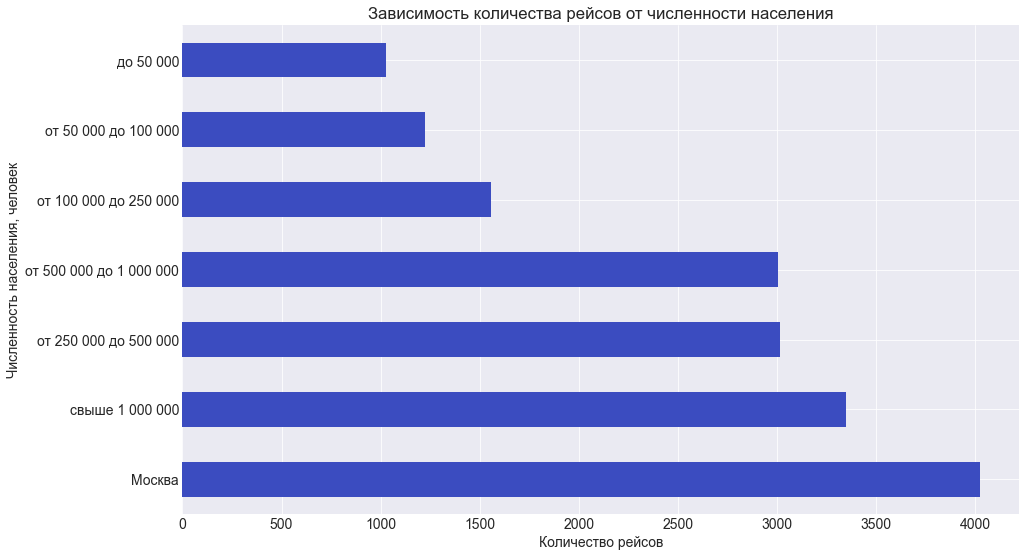

In [28]:
# посмотрим на зависимость количества рейсов от численности населения
pivot_city_flights.plot(x = 'city_group',
                        y = 'total_flights',
                        kind = 'barh',
                        cmap = 'coolwarm',
                        legend = None) 
plt.xlabel('Количество рейсов')
plt.ylabel('Численность населения, человек')
plt.grid(True)
plt.title('Зависимость количества рейсов от численности населения')
plt.show()

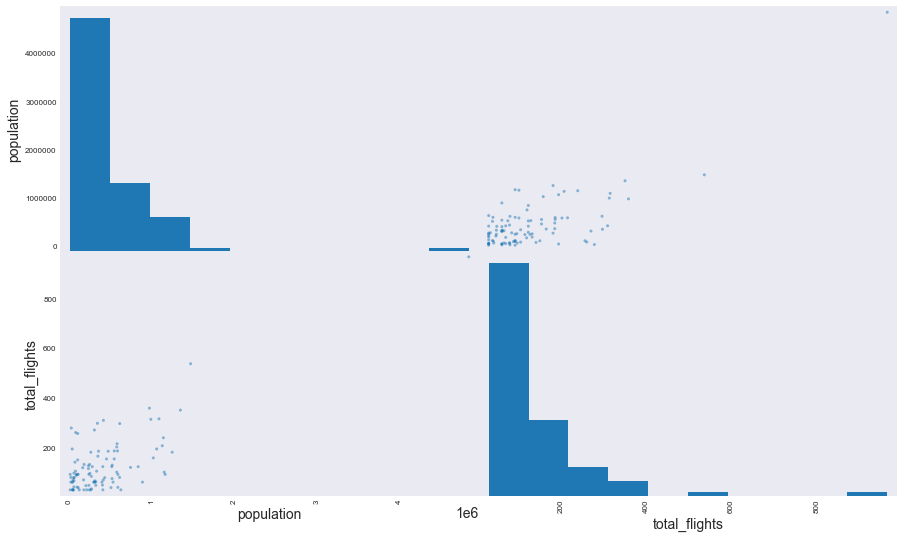

In [29]:
# построим матрицу рассеяния по значениям численности населения и количества рейсов
pd.plotting.scatter_matrix(city_flights.query('city != "Москва"')[['population', 'total_flights']])
plt.show()

In [30]:
# рассчитаем коэффициенты корреляции значений численности населения и количества рейсов
corr = city_flights.query('city != "Москва"')[['population', 'total_flights']].corr().round(2)
corr.style.background_gradient(cmap = 'coolwarm')

,population,total_flights
population,1.000000,0.770000
total_flights,0.770000,1.000000


График зависимости количества рейсов от численности населения, матрица рассеяния и рассчитанный коэффициент корреляции показывают высокую прямую зависимость между категорией населенного пункта и количеством рейсов в него: чем крупнее город, тем больше в него рейсов.

Проанализируем топ-10 городов с наибольшим количеством рейсов.

In [31]:
# выделим топ-10 городов с наибольшим количеством рейсов
top_city_flights = city_flights.sort_values(by = 'total_flights',
                                            ascending = False)\
                               .head(10)\
                               .reset_index(drop = True)
top_city_flights

,city,average_flights,total_flights,population,city_group
0,Москва,129.77,4023,11514330,Москва
1,Санкт-Петербург,31.16,966,4848742,свыше 1 000 000
2,Новосибирск,17.32,537,1473737,свыше 1 000 000
3,Красноярск,11.58,359,973891,от 500 000 до 1 000 000
4,Екатеринбург,11.32,351,1350136,свыше 1 000 000
5,Ростов-на-Дону,10.19,316,1089851,свыше 1 000 000
6,Пермь,10.13,314,991530,от 500 000 до 1 000 000
7,Брянск,10.00,310,415640,от 250 000 до 500 000
8,Сочи,9.61,298,343285,от 250 000 до 500 000
9,Ульяновск,9.58,297,613793,от 500 000 до 1 000 000


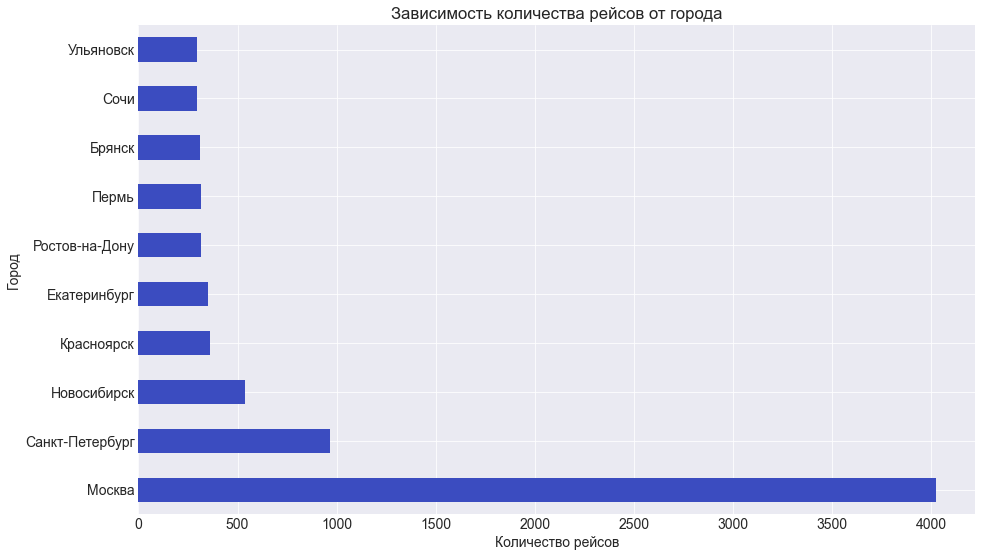

In [32]:
# посмотрим на зависимость количества рейсов от города
top_city_flights.plot(x = 'city',
                      y = 'total_flights',
                      kind = 'barh',
                      cmap = 'coolwarm',
                      legend = None) 
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.grid(True)
plt.title('Зависимость количества рейсов от города')
plt.show()

Наибольшее количество рейсов осуществляется в Москву. Москва имеет несколько аэропортов, каждый из которых является хабом для различных авиакомпаний, принимая не только внутренние, но и международные рейсы. Для авиакомпании «F9», скорее всего, существует большое число рейсов, стыковка которых осуществляется в Москве. Присутствие остальных городов в топ-10 по количеству рейсов в основном подтверждает изложенную ранее закономерность: чем крупнее город, тем больше в него рейсов.

Проанализируем топ-10 городов с наибольшим количеством рейсов на 1 000 населения.

In [33]:
# добавим в таблицу столбец с количеством рейсов на 1 000 населения
city_flights['flights_per_thousand_population'] = (city_flights['total_flights'] / city_flights['population'] * 1000).round(2)
city_flights.head()

,city,average_flights,total_flights,population,city_group,flights_per_thousand_population
0,Абакан,3.87,120,165183,от 100 000 до 250 000,0.73
1,Анадырь,1.00,31,13053,до 50 000,2.37
2,Анапа,2.16,67,58983,от 50 000 до 100 000,1.14
3,Архангельск,5.35,166,348716,от 250 000 до 500 000,0.48
4,Астрахань,2.45,76,520662,от 500 000 до 1 000 000,0.15


In [34]:
# выделим топ-10 городов с наибольшим количеством рейсов на 1 000 населения
top_city_flights_per_thousand = city_flights.sort_values(by = 'flights_per_thousand_population',
                                                         ascending = False)\
                                            .head(10)\
                                            .reset_index(drop = True)
top_city_flights_per_thousand

,city,average_flights,total_flights,population,city_group,flights_per_thousand_population
0,Советский,9.00,279,26434,до 50 000,10.55
1,Удачный,3.00,93,12611,до 50 000,7.37
2,Мирный,6.29,195,37179,до 50 000,5.24
3,Нарьян-Мар,2.61,81,21296,до 50 000,3.80
4,Ханты-Мансийск,8.42,261,79410,от 50 000 до 100 000,3.29
5,Белоярский,2.00,62,20283,до 50 000,3.06
6,Новый Уренгой,8.29,257,104144,от 100 000 до 250 000,2.47
7,Анадырь,1.00,31,13053,до 50 000,2.37
8,Воркута,4.58,142,70551,от 50 000 до 100 000,2.01
9,Когалым,3.16,98,58192,от 50 000 до 100 000,1.68


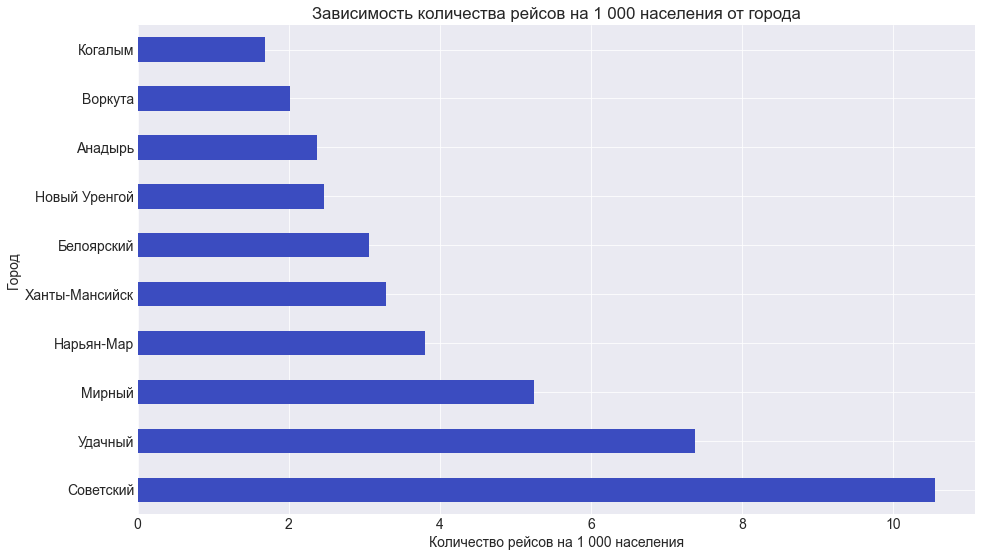

In [35]:
# посмотрим на зависимость количества рейсов на 1 000 населения от города
top_city_flights_per_thousand.plot(x = 'city',
                      y = 'flights_per_thousand_population',
                      kind = 'barh',
                      cmap = 'coolwarm',
                      legend = None) 
plt.xlabel('Количество рейсов на 1 000 населения')
plt.ylabel('Город')
plt.grid(True)
plt.title('Зависимость количества рейсов на 1 000 населения от города')
plt.show()

В отличие от топ-10 городов с наибольшим количеством рейсов, в топ-10 городов с наибольшим количеством рейсов на 1 000 населения попали в основном малые и средние города. Все эти города находятся в труднодоступных местах, транспортное сообщение с ними осуществляется в основном посредством авиации.

##### Анализ зависимости количества рейсов от моделей самолетов

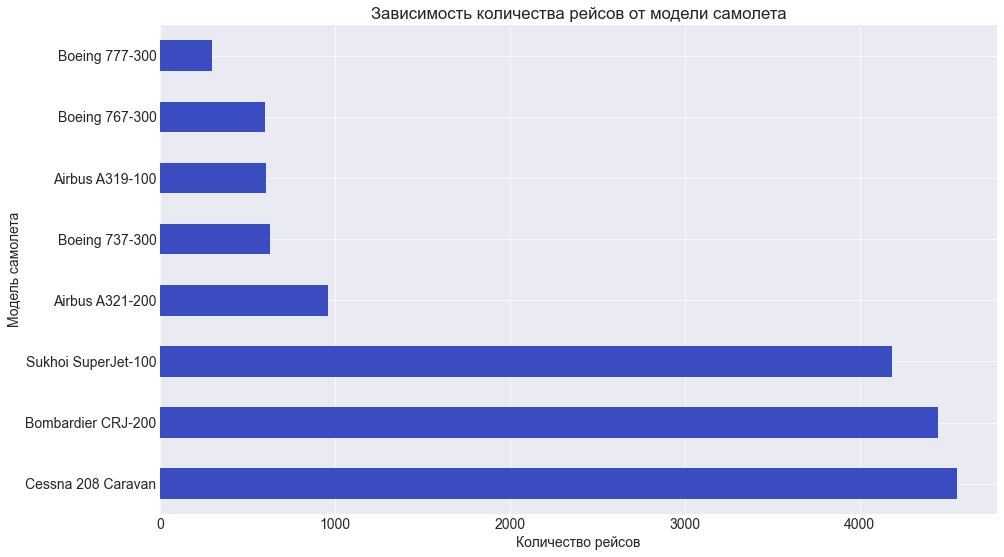

In [36]:
# посмотрим на зависимость количества рейсов от модели самолета
model_flights.sort_values(by = 'flights_amount',
                          ascending = False)\
             .plot(x = 'model',
                   y = 'flights_amount',
                   kind = 'barh',
                   cmap = 'coolwarm',
                   legend = None) 
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')
plt.grid(True)
plt.title('Зависимость количества рейсов от модели самолета')
plt.show()

Наибольшее количество рейсов было осуществлено на самолетах малой ("Cessna 208 Caravan") и средней ("Bombardier CRJ-200", "Sukhoi SuperJet-100") вместимости, наименьшее - на самых крупных самолетах ("Boeing 777-300").

Проанализируем количество превезенных пассажиров по моделям самолетов.

[Найдем](http://www.airwar.ru/canow.html) информацию о примерной вместимости салона различных моделей самолетов.

In [37]:
# содадим Dataframe с вместимостью салона по моделям самолетов
model_capacity = [['Airbus A319-100', 124],
                  ['Airbus A321-200', 185],
                  ['Boeing 737-300', 130],
                  ['Boeing 767-300', 216],                  
                  ['Boeing 777-300', 450],
                  ['Bombardier CRJ-200', 50],
                  ['Cessna 208 Caravan', 9],
                  ['Sukhoi SuperJet-100', 95]]
model_flights_capacity = pd.DataFrame(model_capacity,
                                      columns = ['model',
                                                 'capacity'])
model_flights_capacity

,model,capacity
0,Airbus A319-100,124
1,Airbus A321-200,185
2,Boeing 737-300,130
3,Boeing 767-300,216
4,Boeing 777-300,450
5,Bombardier CRJ-200,50
6,Cessna 208 Caravan,9
7,Sukhoi SuperJet-100,95


In [38]:
# добавим в таблицу столбец с вместимостью салона
model_flights = model_flights.merge(model_flights_capacity,
                                    on = 'model',
                                    how ='outer')
model_flights

,model,flights_amount,capacity
0,Airbus A319-100,607,124
1,Airbus A321-200,960,185
2,Boeing 737-300,630,130
3,Boeing 767-300,600,216
4,Boeing 777-300,300,450
5,Bombardier CRJ-200,4446,50
6,Cessna 208 Caravan,4557,9
7,Sukhoi SuperJet-100,4185,95


In [39]:
# рассчитаем коэффициенты корреляции значений вместимости салона и количества рейсов
corr = model_flights[['capacity', 'flights_amount']].corr().round(2)
corr.style.background_gradient(cmap = 'coolwarm')

,capacity,flights_amount
capacity,1.000000,-0.700000
flights_amount,-0.700000,1.000000


Рассчитанный коэффициент корреляции показывает высокую обратную зависимость между вместимостью салона самолета и количеством рейсов на нем: чем крупнее самолет, тем меньше на нем рейсов.

По [сведениям](https://www.atorus.ru/news/press-centre/new/45800.html) Росавиации процент занятости пассажирских кресел в 2018 году составил 83,8%. В авиакомпании «F9» данные аналогичны.

In [40]:
# добавим в таблицу столбец с ориентировочным количеством перевезенных пассажиров
model_flights['approximate_passenger'] =(model_flights['flights_amount'] * model_flights['capacity'] * 0.838).round(0)\
                                                                                                             .astype('int')
model_flights

,model,flights_amount,capacity,approximate_passenger
0,Airbus A319-100,607,124,63075
1,Airbus A321-200,960,185,148829
2,Boeing 737-300,630,130,68632
3,Boeing 767-300,600,216,108605
4,Boeing 777-300,300,450,113130
5,Bombardier CRJ-200,4446,50,186287
6,Cessna 208 Caravan,4557,9,34369
7,Sukhoi SuperJet-100,4185,95,333168


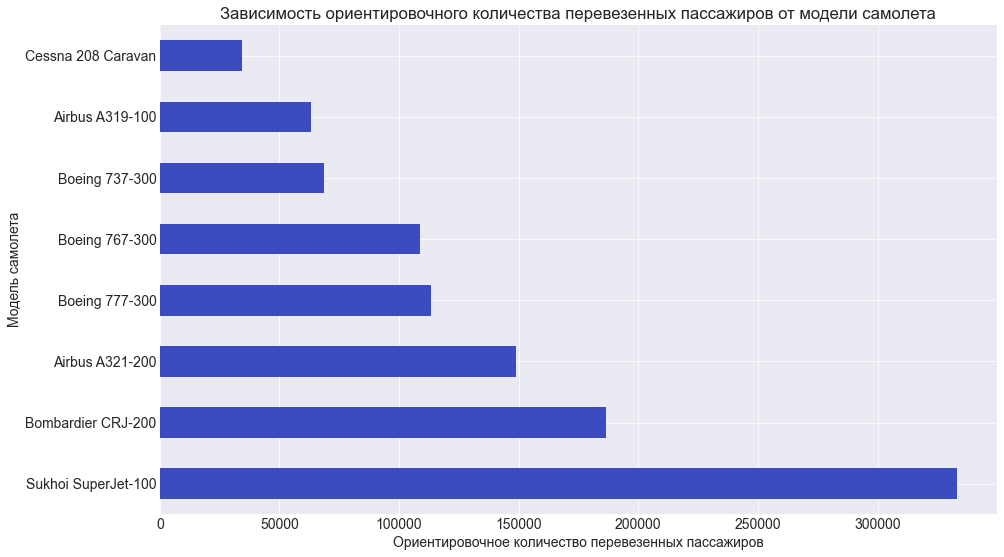

In [41]:
# посмотрим на зависимость ориентировочного количество перевезенных пассажиров от модели самолета
model_flights.sort_values(by = 'approximate_passenger',
                          ascending = False)\
             .plot(x = 'model',
                   y = 'approximate_passenger',
                   kind = 'barh',
                   cmap = 'coolwarm',
                   legend = None) 
plt.xlabel('Ориентировочное количество перевезенных пассажиров')
plt.ylabel('Модель самолета')
plt.grid(True)
plt.title('Зависимость ориентировочного количества перевезенных пассажиров от модели самолета')
plt.show()

Наибольшее количество пассажиров было перевезено на самолетах средней вместимости ("Sukhoi SuperJet-100", "Bombardier CRJ-200"), наименьшее - на самых маленьких самолетах ("Cessna 208 Caravan").

### Вывод

1. Имеется высокая прямая зависимость между категорией населенного пункта и количеством рейсов в него: чем крупнее город, тем больше в него рейсов.   
2. Наибольшее количество рейсов осуществляется в Москву. В ней имеется несколько аэропортов, каждый из которых является хабом для различных авиакомпаний, принимая не только внутренние, но и международные рейсы. Для авиакомпании «F9», скорее всего, существует большое число рейсов, стыковка которых осуществляется в Москве. Присутствие остальных городов в топ-10 по количеству рейсов в основном подтверждает изложенную ранее закономерность: чем крупнее город, тем больше в него рейсов.   
3. В отличие от топ-10 городов с наибольшим количеством рейсов, в топ-10 городов с наибольшим количеством рейсов на 1 000 населения попали в основном малые и средние города. Все эти города находятся в труднодоступных местах, транспортное сообщение с ними осуществляется в основном посредством авиации.  
4. Наибольшее количество рейсов было осуществлено на самолетах малой ("Cessna 208 Caravan") и средней ("Bombardier CRJ-200", "Sukhoi SuperJet-100") вместимости, наименьшее - на самых крупных самолетах ("Boeing 777-300").   
5. Имеется высокая обратная зависимость между вместимостью салона самолета и количеством рейсов на нем: чем крупнее самолет, тем меньше на нем рейсов.  
6. Наибольшее количество пассажиров было перевезено на самолетах средней вместимости ("Sukhoi SuperJet-100", "Bombardier CRJ-200"), наименьшее - на самых маленьких самолетах ("Cessna 208 Caravan").

### Общий вывод
<a name="conclusion"></a>

1. Количество вылетов из каждого аэропорта варьируется от 34 до 6 376, то есть загруженность аэропортов значительно различается между собой.     
2. Количество рейсов в сентябре 2018 года для "Airbus" составило 1 567, для "Boeing" - 1 530, других моделей - 13 188.  
3. Установлены 3 фестиваля, которые проходили с 23 июля по 30 сентября 2018 года в Москве.  
4. Гипотеза, что количество рейсов во время фестивалей увеличивается, не нашла своего подверждения. 
5. Имеется высокая прямая зависимость между категорией населенного пункта и количеством рейсов в него: чем крупнее город, тем больше в него рейсов.   
6. Наибольшее количество рейсов осуществляется в Москву, аэропорты которой являются стыковочным хабом для различных рейсов. 
7. В топ-10 городов с наибольшим количеством рейсов на 1 000 населения попали в основном малые и средние города, которые находятся в труднодоступных местах и транспортное сообщение с которыми осуществляется преимущественно посредством авиации.  
8. Наибольшее количество рейсов было осуществлено на самолетах малой и средней вместимости, наименьшее - на самых крупных самолетах.  
9. Имеется высокая обратная зависимость между вместимостью салона самолета и количеством рейсов на нем: чем крупнее самолет, тем меньше на нем рейсов.   
10. Наибольшее количество пассажиров было перевезено на самолетах средней вместимости, наименьшее - на самых маленьких самолетах.